

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Note: The functions used here are created by me. If you use them don't forget to give credit to me. I have spent alot of time building them.</h1>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Introduction </h1></div>



![](https://www.ceres.org/sites/default/files/2020-09/Future%20water%20banner%20%281%29.png)
#### [Image Source](https://www.ceres.org/sites/default/files/2020-09/Future%20water%20banner%20%281%29.png)

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<p style="text-align:center;"> Water quality is one amongst the foremost important factors in a healthy ecosystem. Clean water supports various plants and wildlife. Though it's going to seem unrelated initially , our actions ashore affect the standard of our water. Pollutants,from fertilizers, and sediment frequently get carried into lakes and rivers via runoff from urban areas or agricultural fields.  </p>
</div>



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Libraries </h1>
</div>


In [1]:
pip install lucifer-ml

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook

from luciferml.supervised import classification as cls ## Importing LuciferML

import warnings
warnings.simplefilter(action='ignore', category=Warning)


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Dataset </h1>
</div>


In [3]:
dataset = pd.read_csv('water_potability.csv')


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Exploratory Data Analysis </h1>
</div>


In [4]:
dataset.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
dataset.shape

(3276, 10)

In [6]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

In [7]:
dataset.isnull().values.any()

True

In [8]:
dataset.dropna(inplace =True)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Countplot for Potability</h2>
</div>


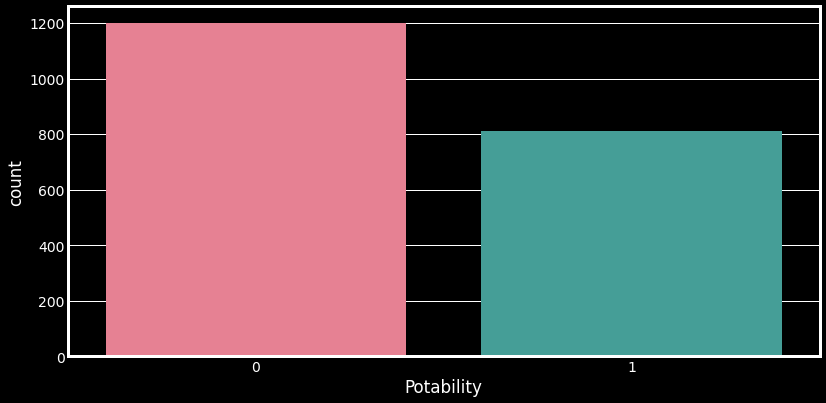

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=dataset, palette='husl');

In [10]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Box Plots</h2>
</div>


Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

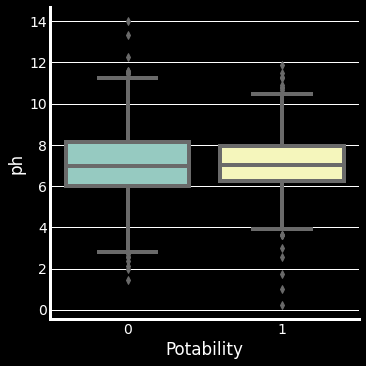

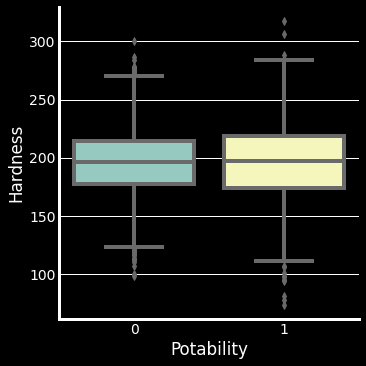

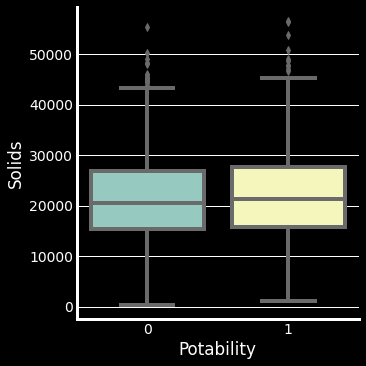

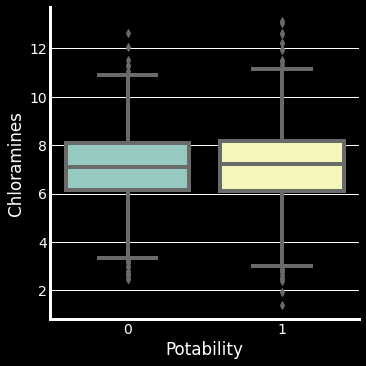

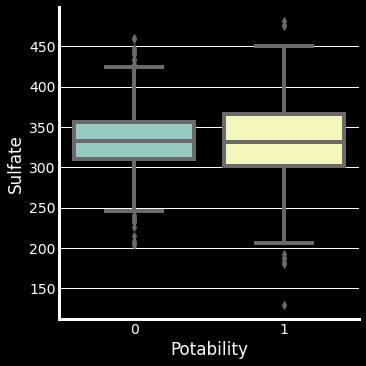

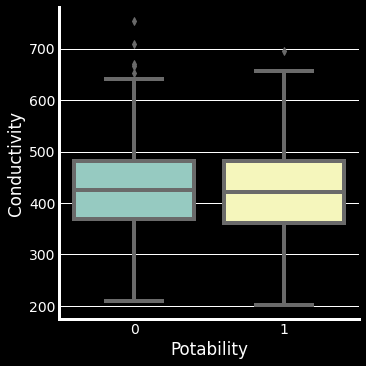

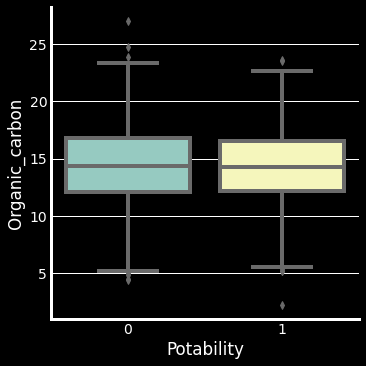

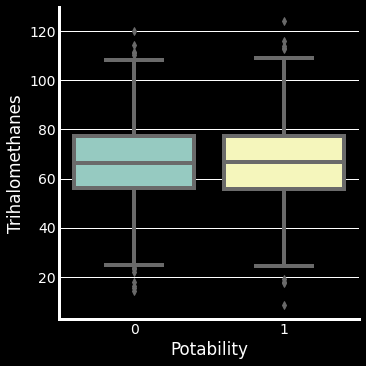

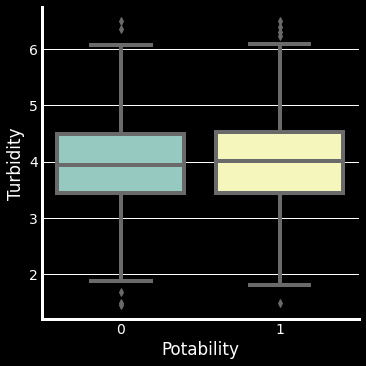

In [11]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Potability", y=columnName, data=dataset, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(dataset, column)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pie Chart</h2>
</div>



In [12]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

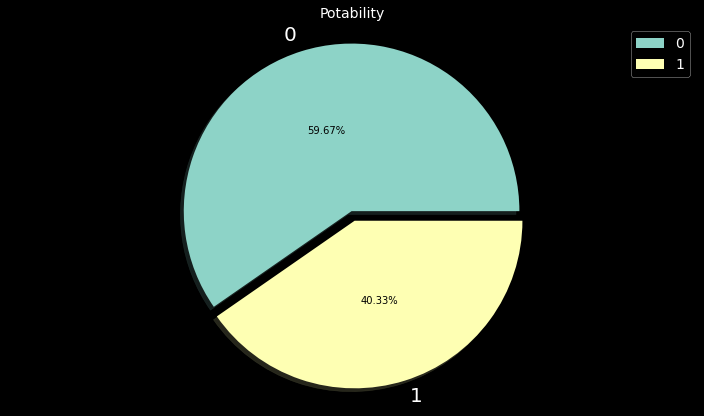

In [13]:
pieChartPlotter(dataset, 'Potability') 



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Correlation Plot</h2>
</div>

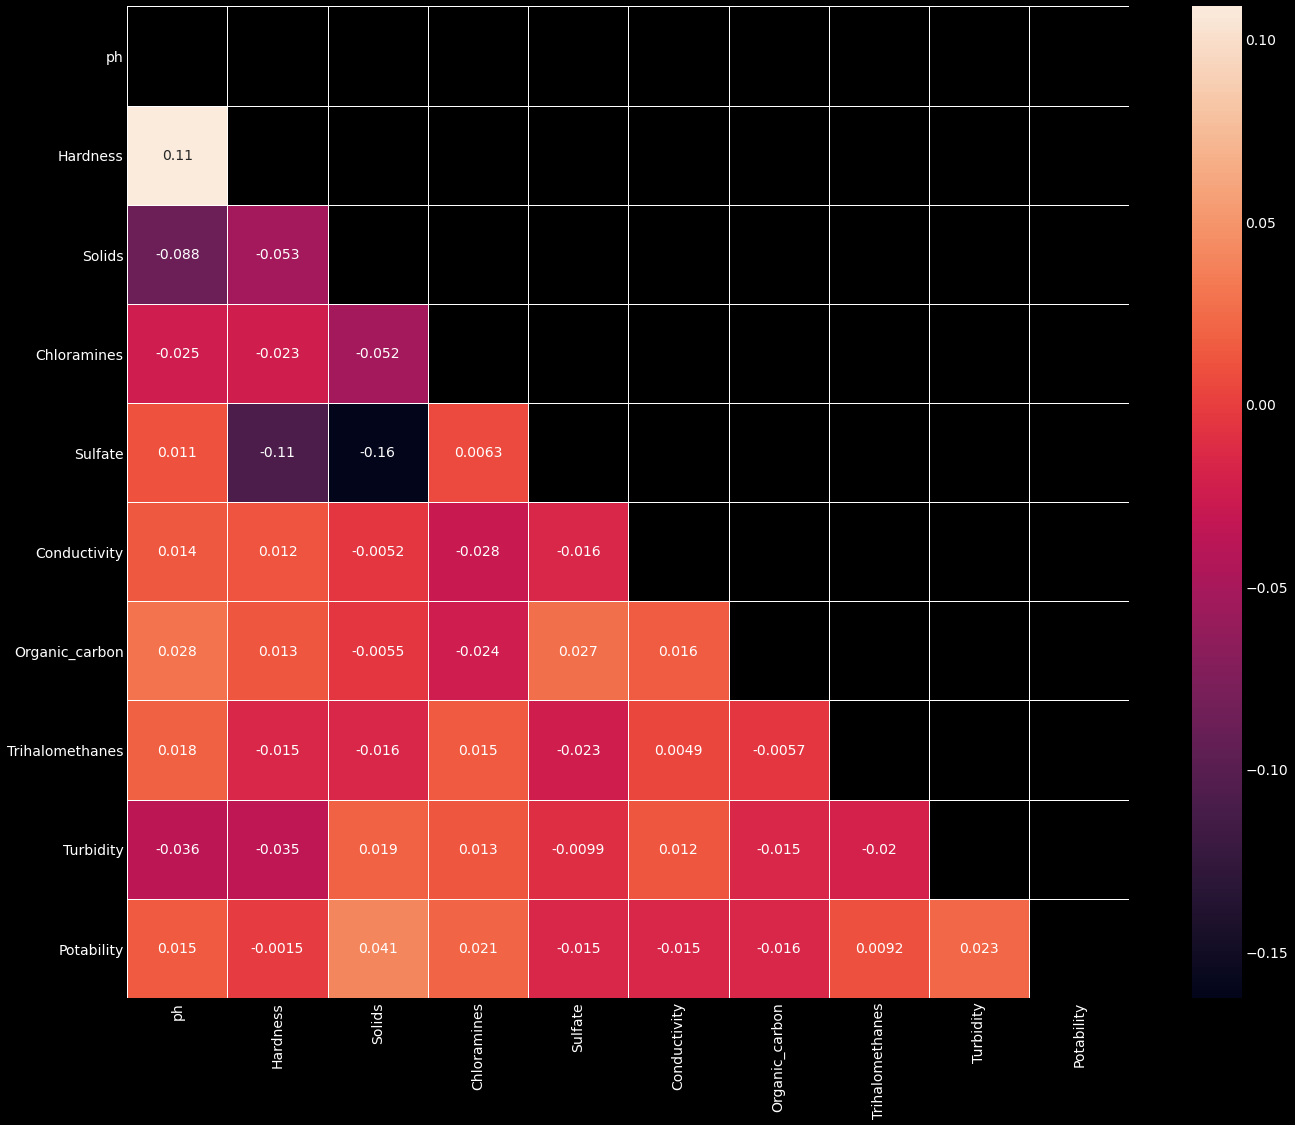

In [14]:
plt.figure(figsize=(20, 17))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Distribution Plots</h2>
</div>


In [15]:
def distributionPlot(dataset):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(dataset.columns)), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(dataset.columns)/3), 3, i+1)
        sns.distplot(
            dataset.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

In [16]:
plot_data = dataset.drop(['Potability'], axis =1)

Your plots are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

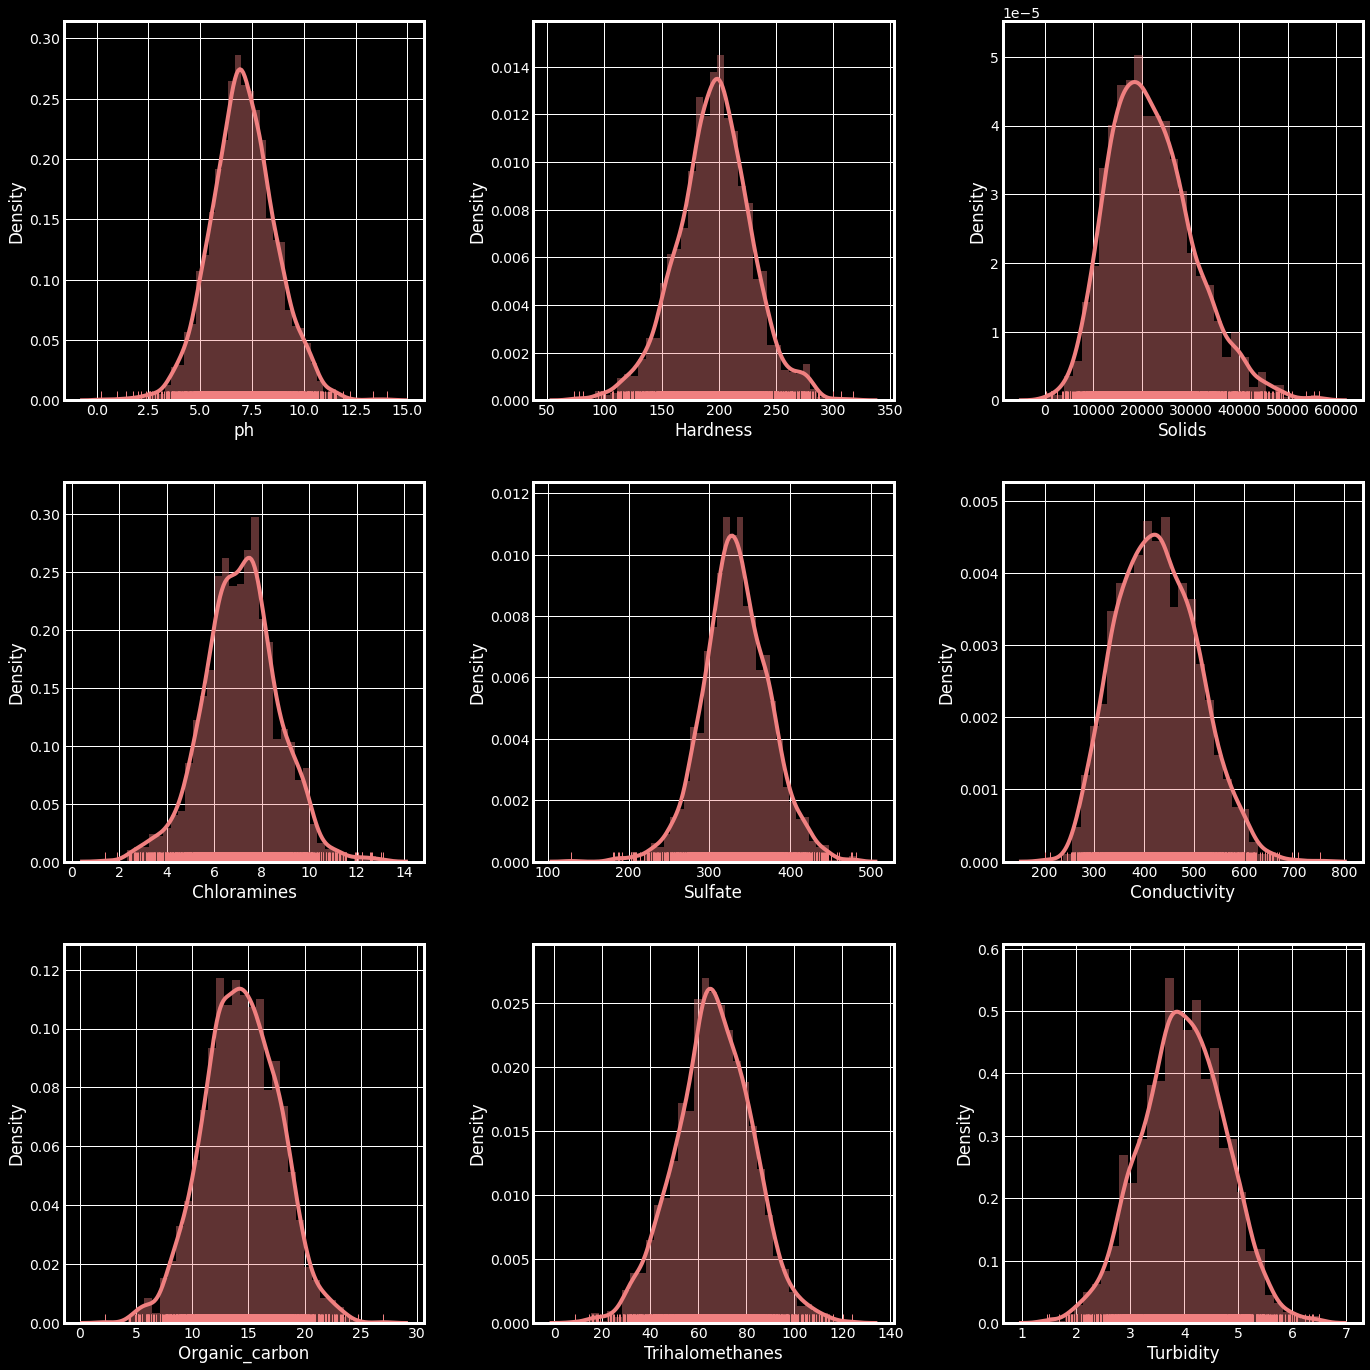

In [17]:
distributionPlot(plot_data)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pairplots</h2>
</div>



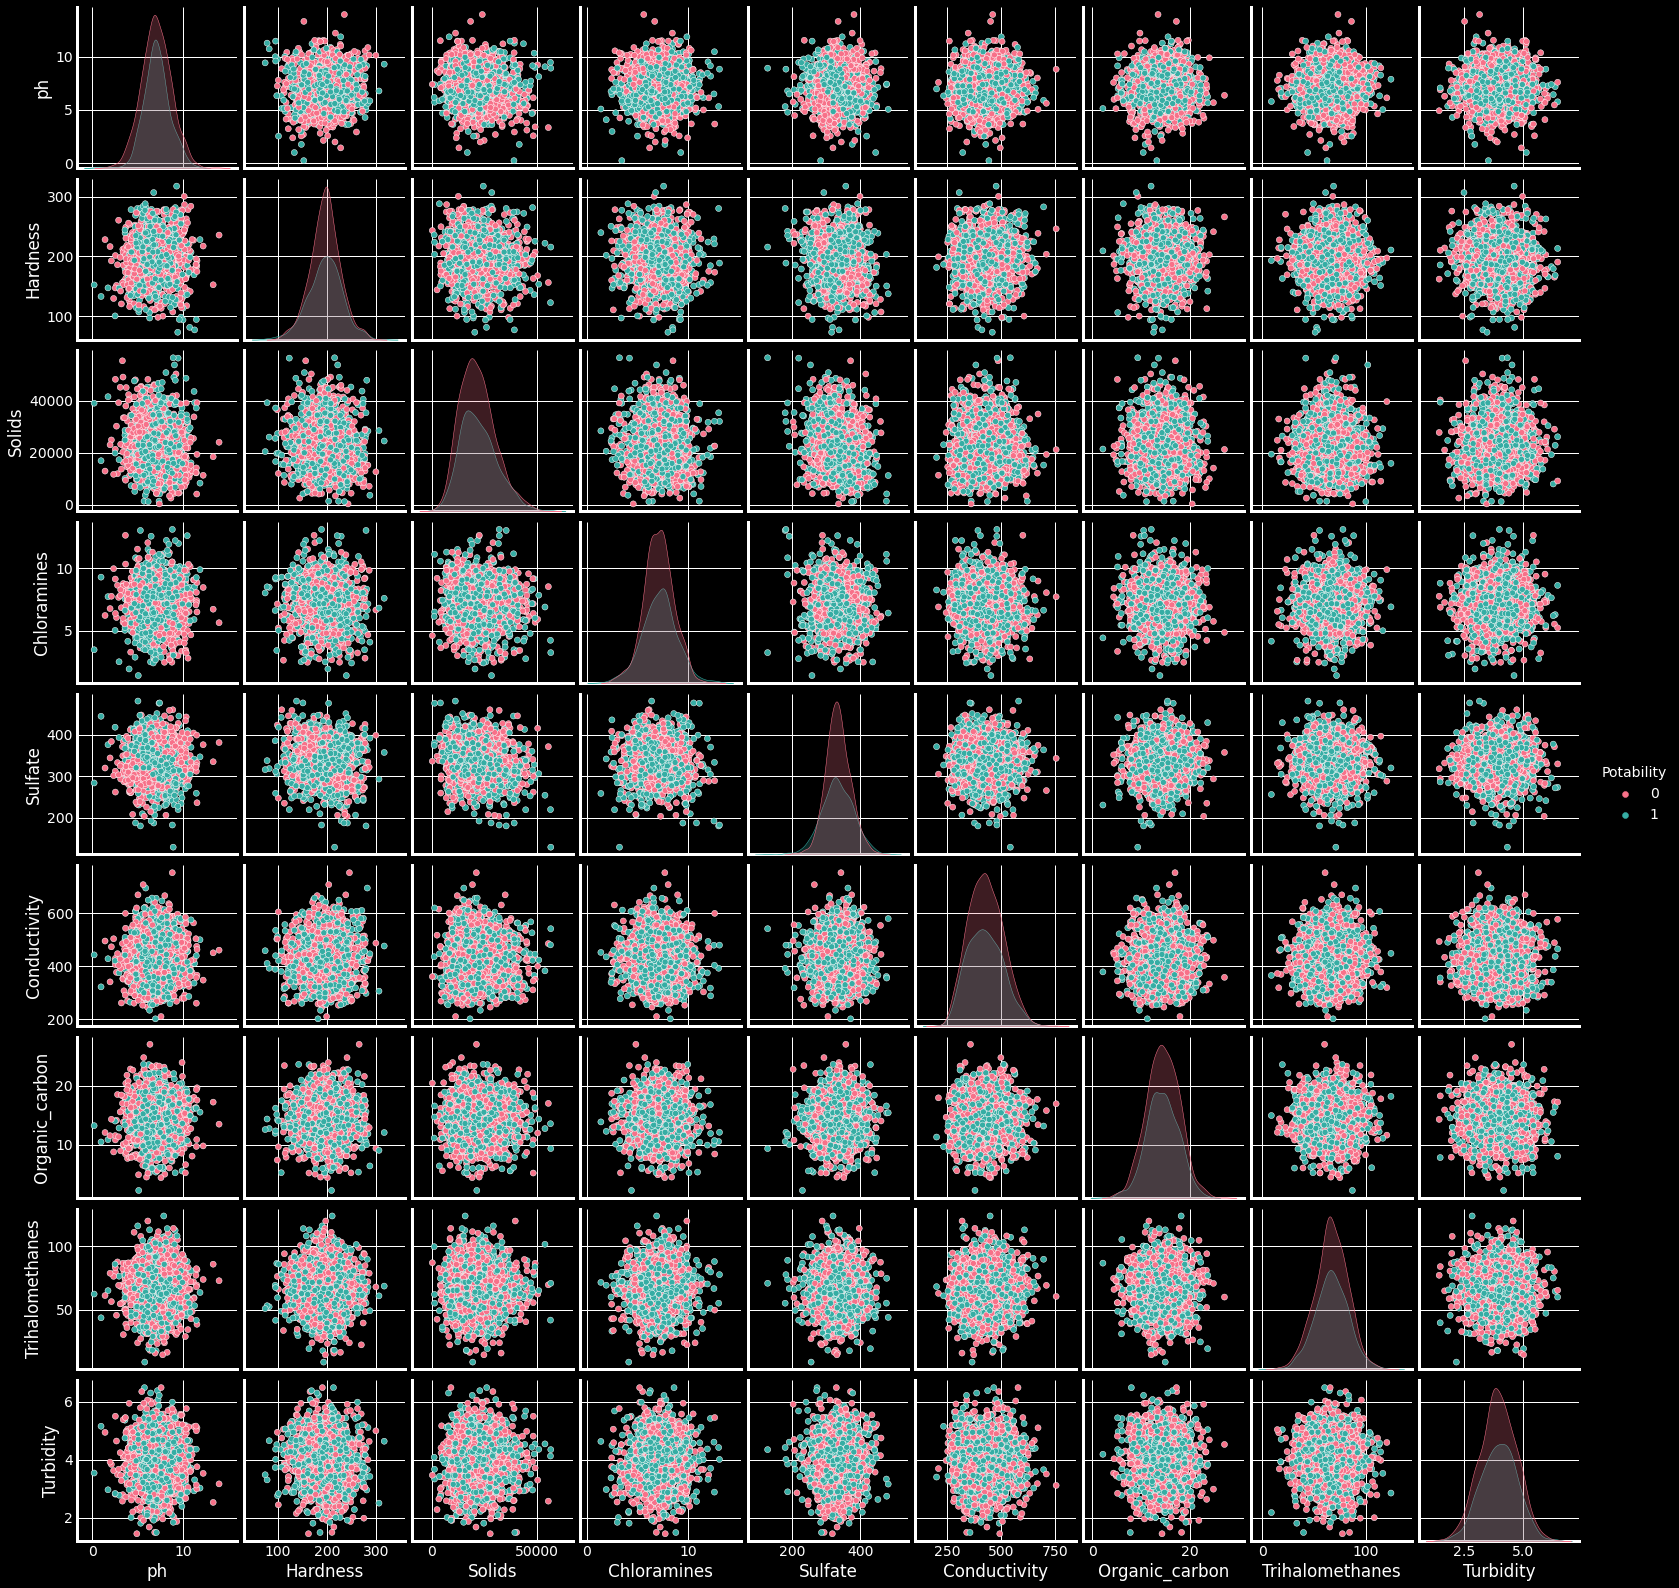

In [18]:
sns.pairplot(dataset, hue="Potability", palette="husl");

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h4 style="text-align:left;">From above charts we can confirm</h4>
<p style="text-align:left;">1) There seems to be very less correlation between all the features.
    <br>
2) 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity' columns are skewed. So, lets correct it</p>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight:bold">Data Preprocessing</h1>
</div>





<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Skewness Correction</h2>
</div>



In [19]:
def skewnessCorrector(dataset,columnName):
    import seaborn as sns
    from scipy import stats
    from scipy.stats import norm, boxcox
    """
    This function returns two plots distplot and probability plot for non-normalized data and after normalizing the provided data. 
    Just provide it with two parameters dataset and the name of column.
    It corrects the skewness of data applying Boxcox transformation on the provided data
    """
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(dataset[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="lightcoral");
    plt.title(columnName.capitalize() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()
    # Applying BoxCox Transformation
    dataset[columnName], lam_fixed_acidity = boxcox(
        dataset[columnName])
    
    print('''After Correcting''')
    (mu, sigma) = norm.fit(dataset[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="orange");
    plt.title(columnName.capitalize() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()
    return dataset

Before Correcting
Mu before correcting Hardness : 195.9680715571974, Sigma before correcting Hardness : 32.62696937081507


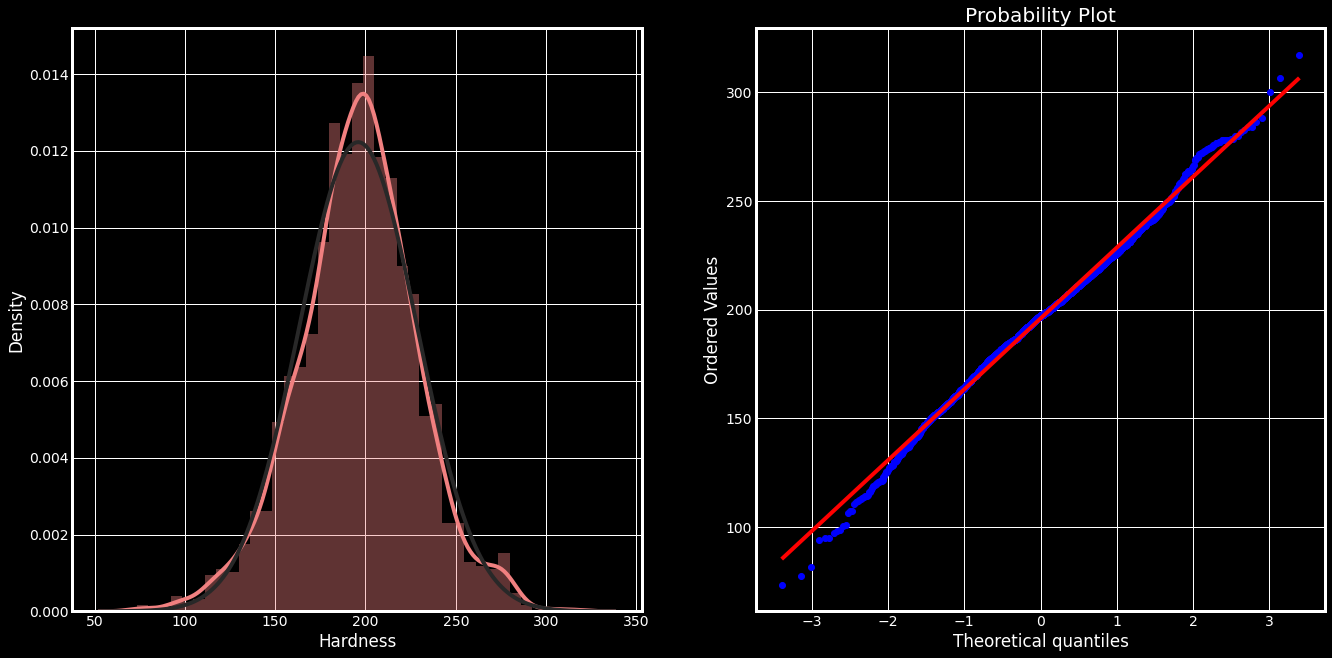

After Correcting
Mu after correcting Hardness : 428.92024380387204, Sigma after correcting Hardness : 83.84836083937279


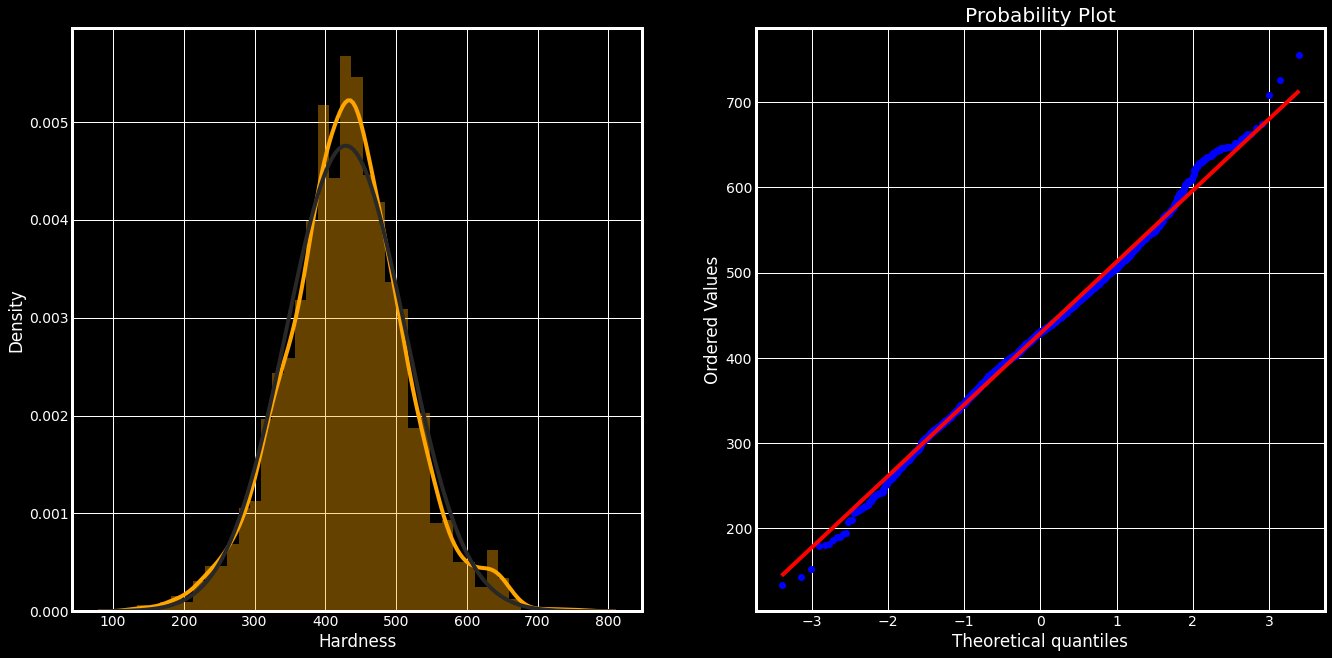

Before Correcting
Mu before correcting Solids : 21917.441374490332, Sigma before correcting Solids : 8640.090806098791


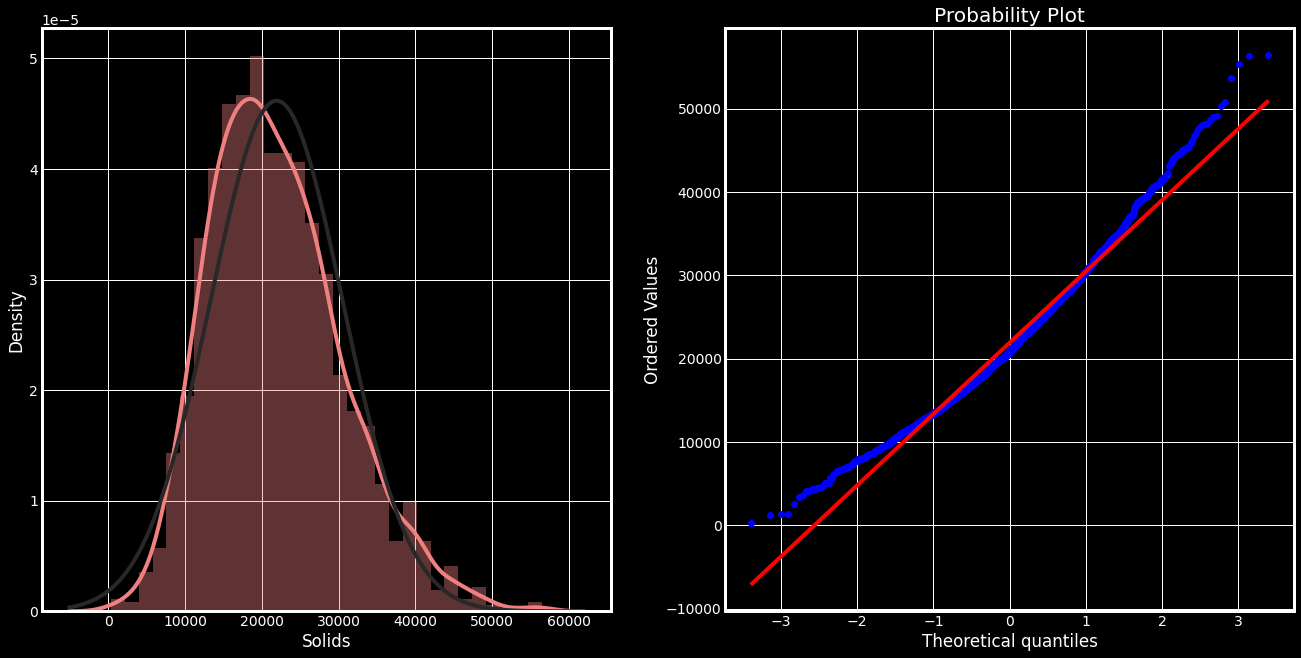

After Correcting
Mu after correcting Solids : 381.05933605714364, Sigma after correcting Solids : 83.05193174633683


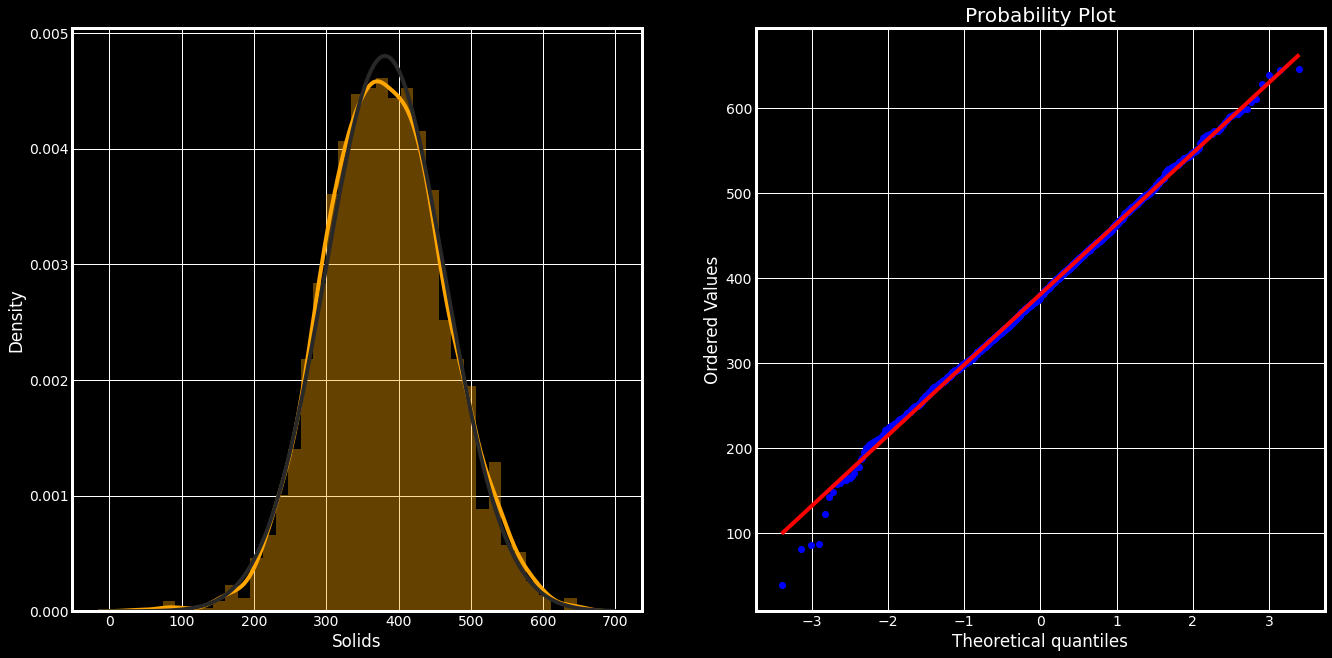

Before Correcting
Mu before correcting Chloramines : 7.134338414511035, Sigma before correcting Chloramines : 1.5844257944238938


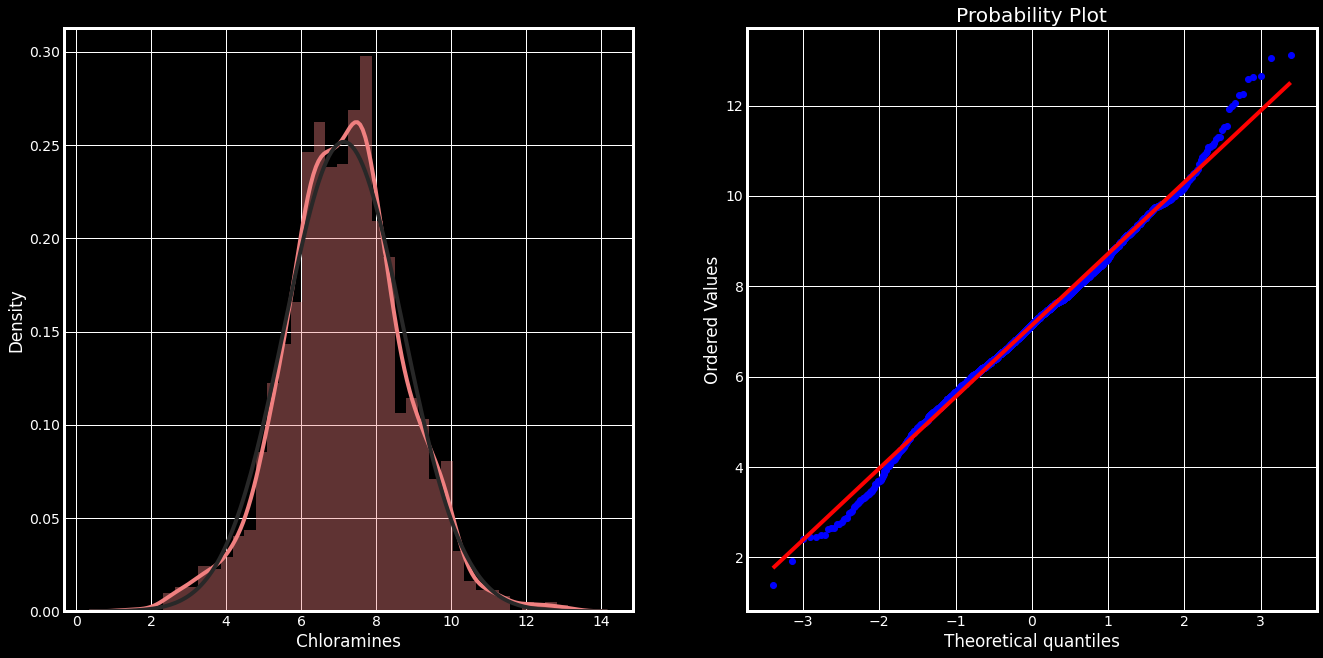

After Correcting
Mu after correcting Chloramines : 6.383801813191314, Sigma after correcting Chloramines : 1.679863720784296


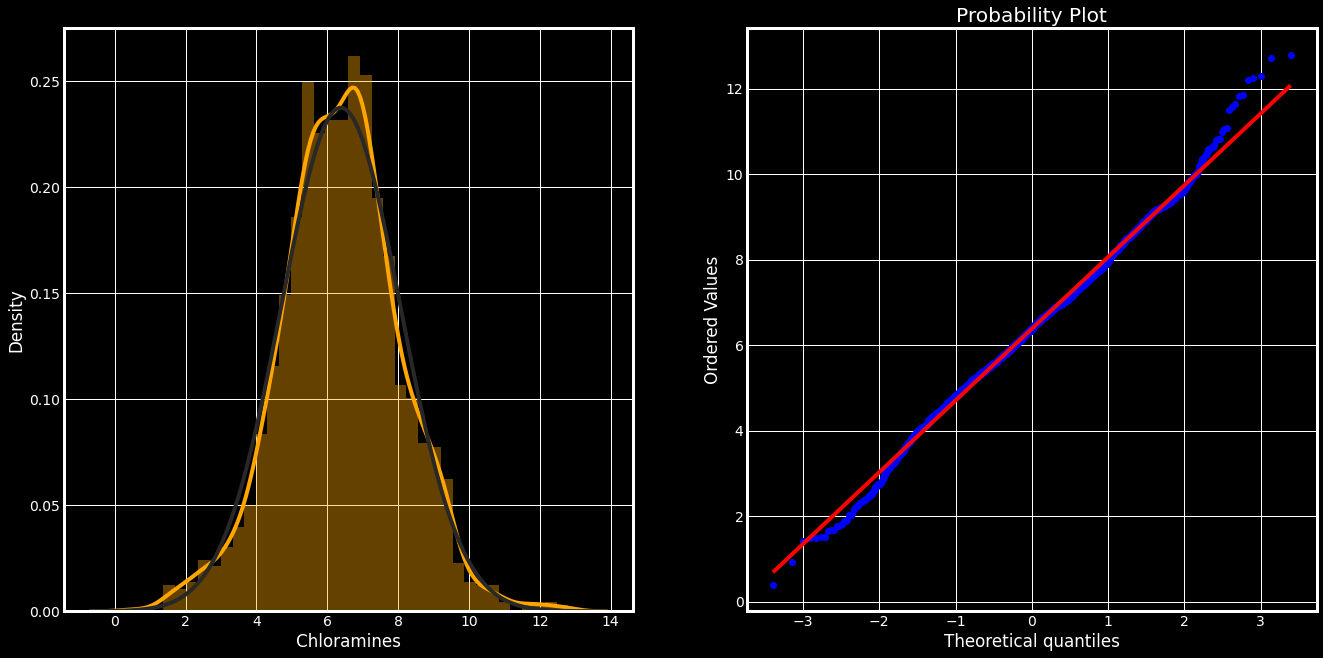

Before Correcting
Mu before correcting Sulfate : 333.22467188905864, Sigma before correcting Sulfate : 41.194925817413676


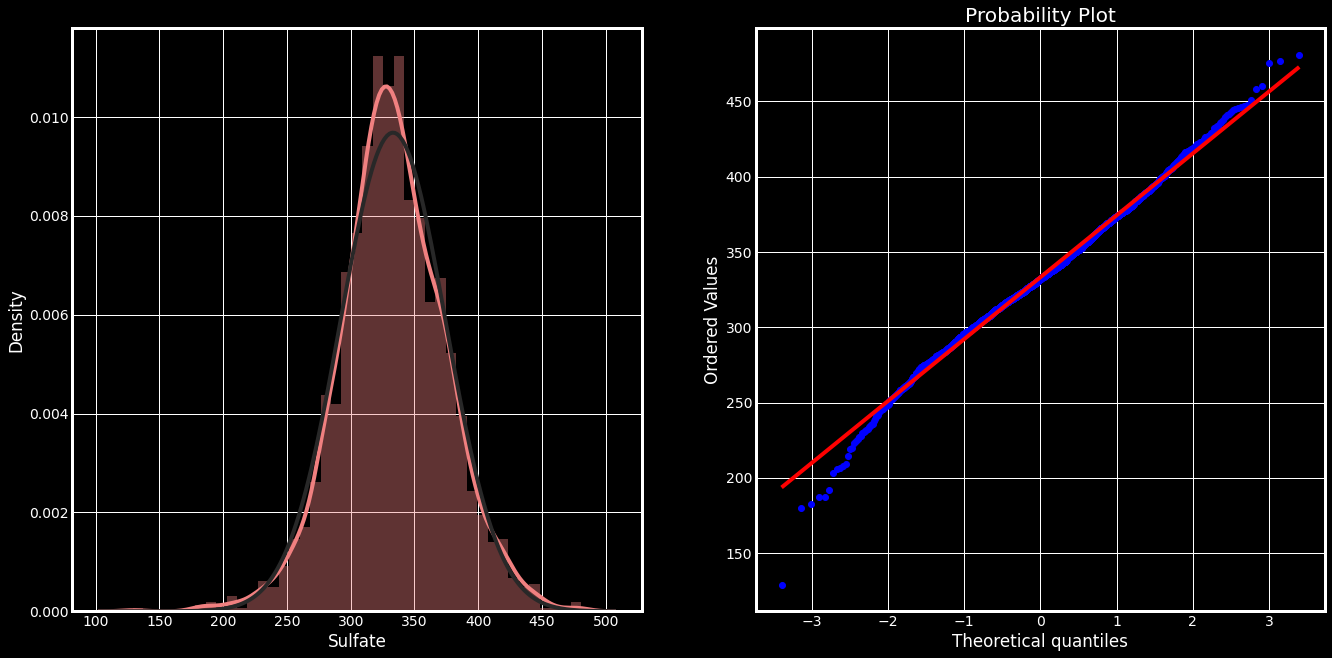

After Correcting
Mu after correcting Sulfate : 732.7640932451936, Sigma after correcting Sulfate : 104.99774878081642


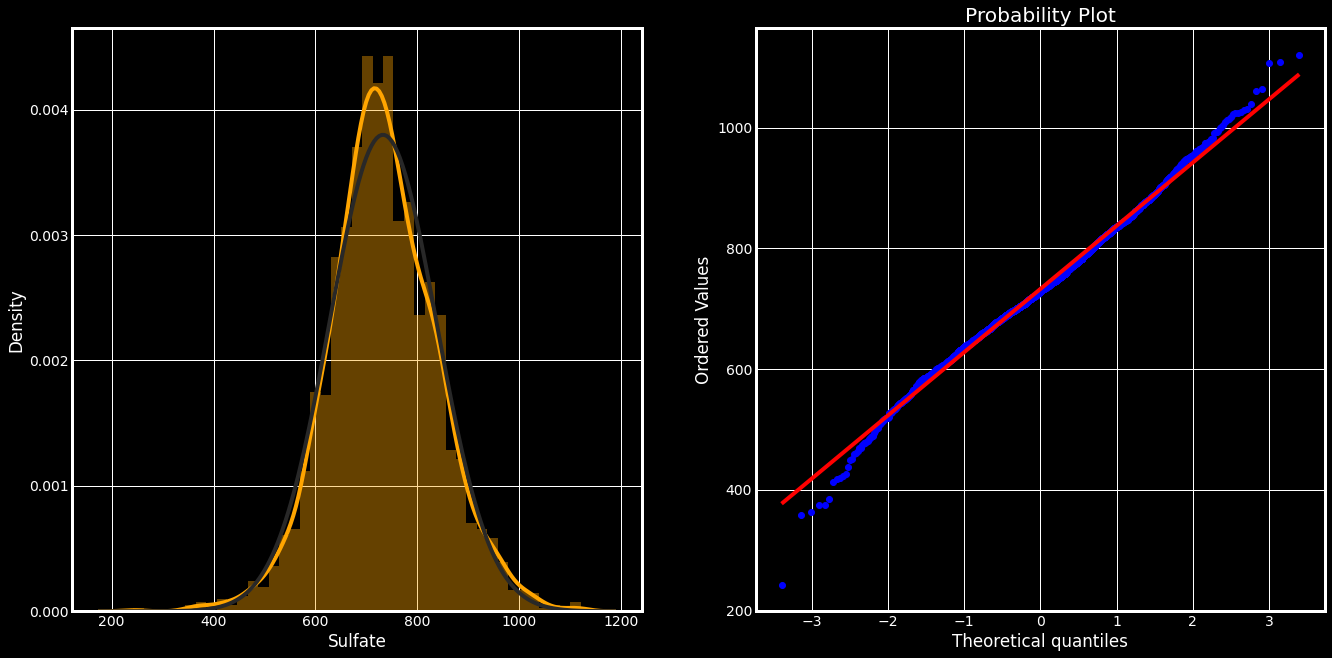

Before Correcting
Mu before correcting Conductivity : 426.5264087317783, Sigma before correcting Conductivity : 80.69250214345881


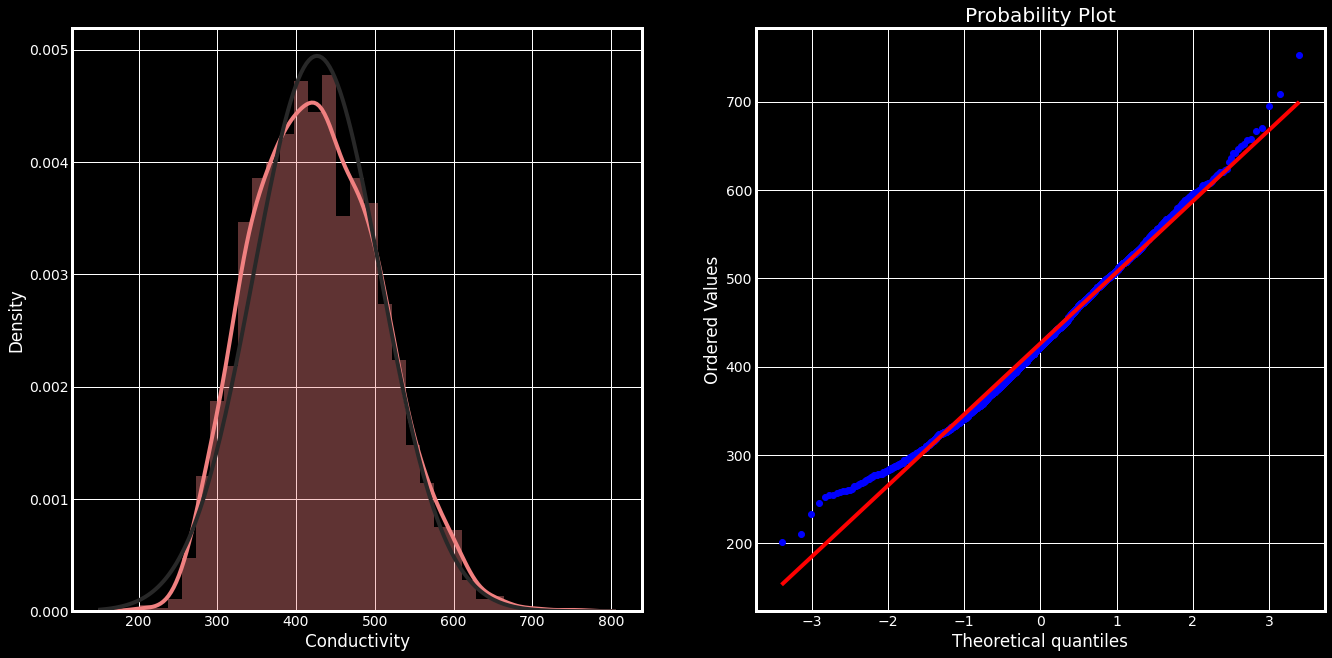

After Correcting
Mu after correcting Conductivity : 26.134426932412218, Sigma after correcting Conductivity : 2.2087061500381115


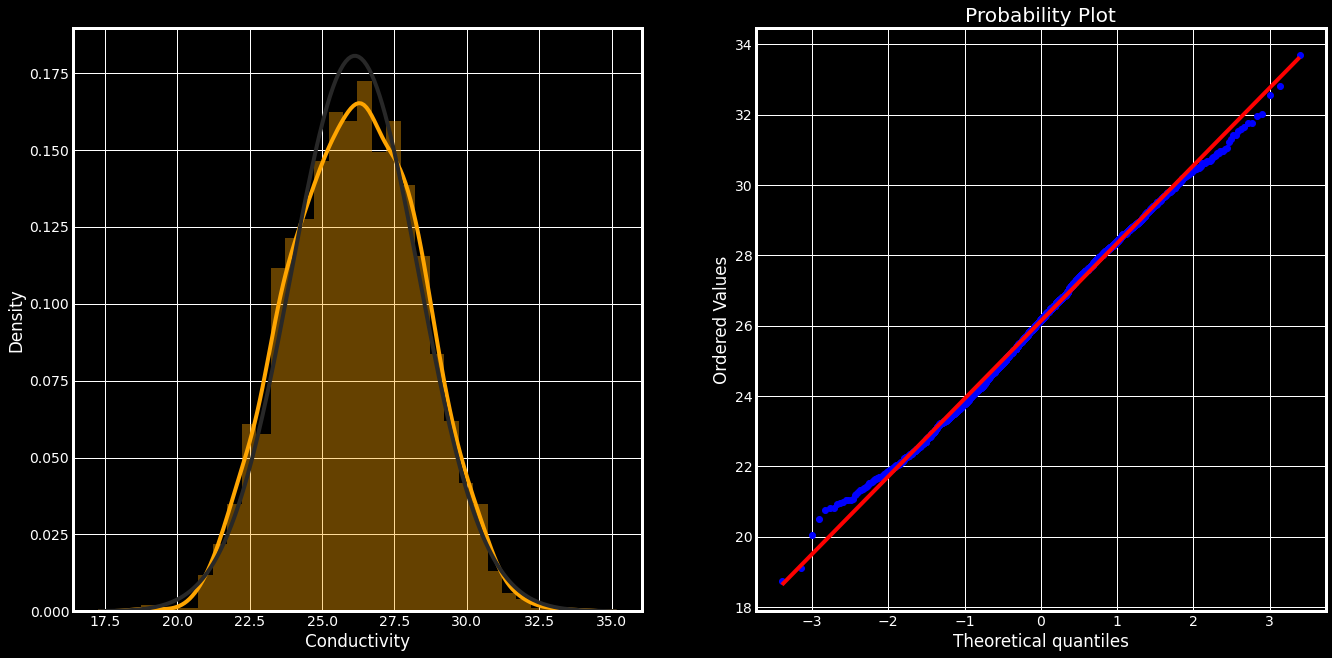

Before Correcting
Mu before correcting Organic_carbon : 14.357709409067539, Sigma before correcting Organic_carbon : 3.3241318633200096


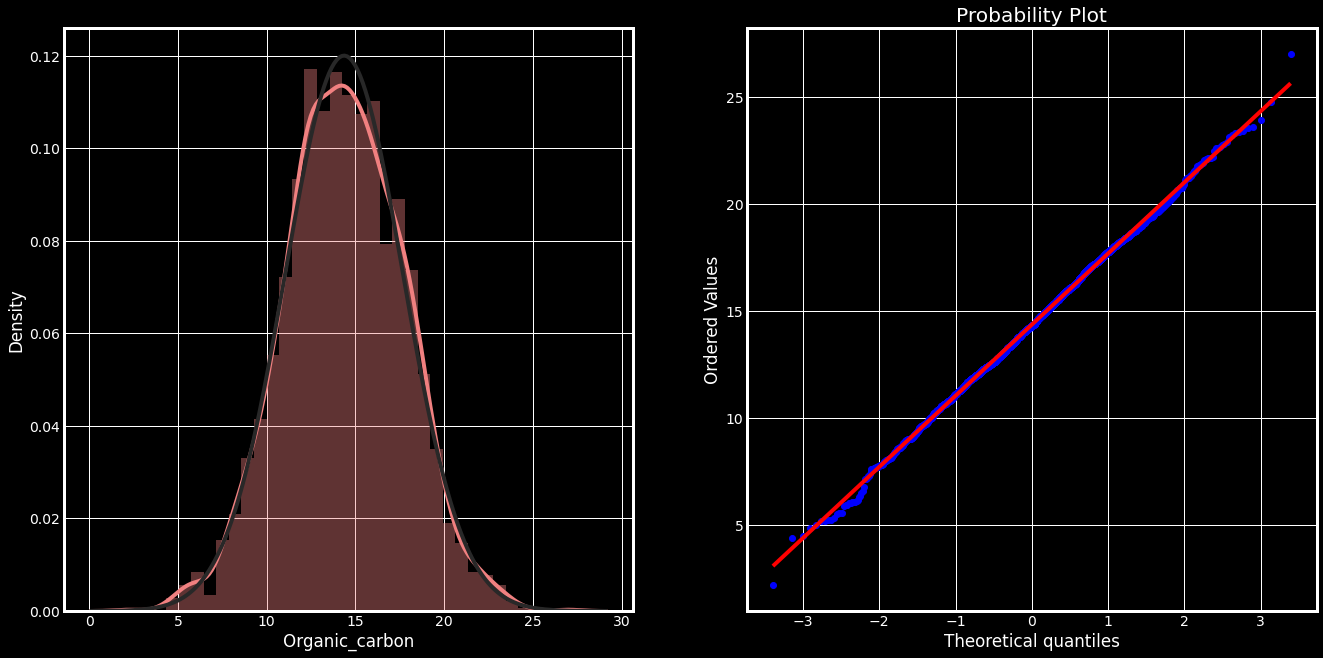

After Correcting
Mu after correcting Organic_carbon : 14.096379060830113, Sigma after correcting Organic_carbon : 3.58155882891936


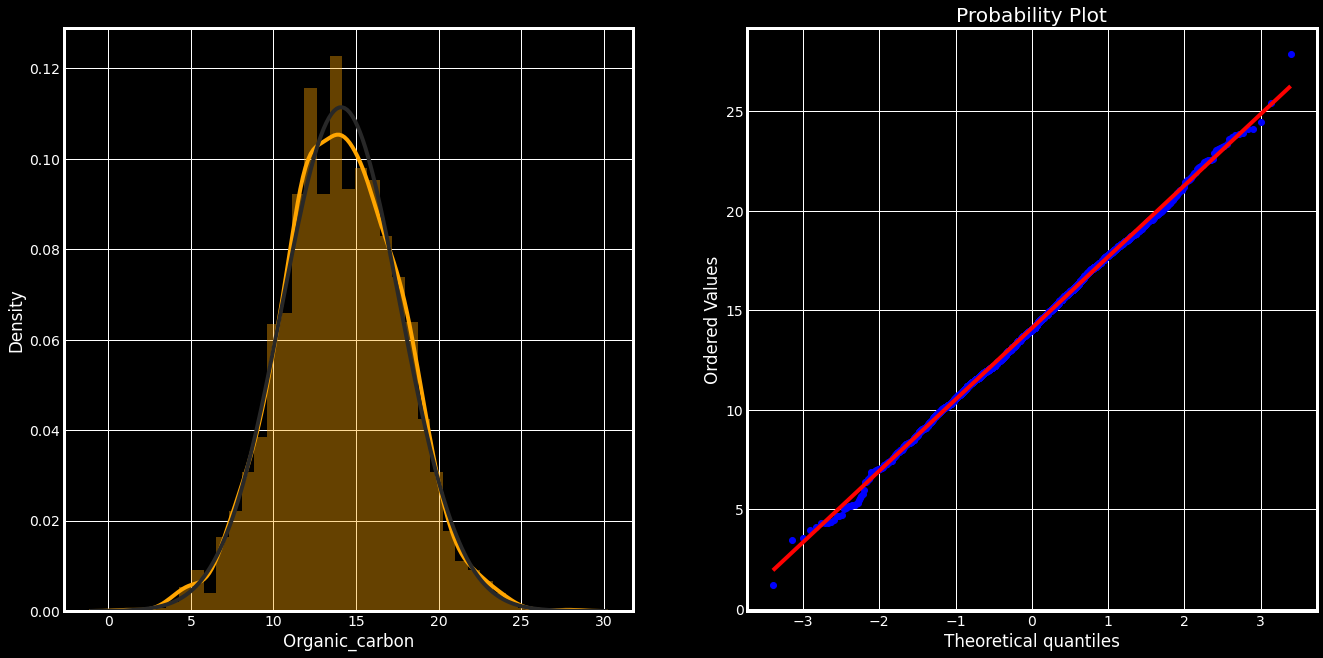

Before Correcting
Mu before correcting Trihalomethanes : 66.4008593672628, Sigma before correcting Trihalomethanes : 16.0731116931157


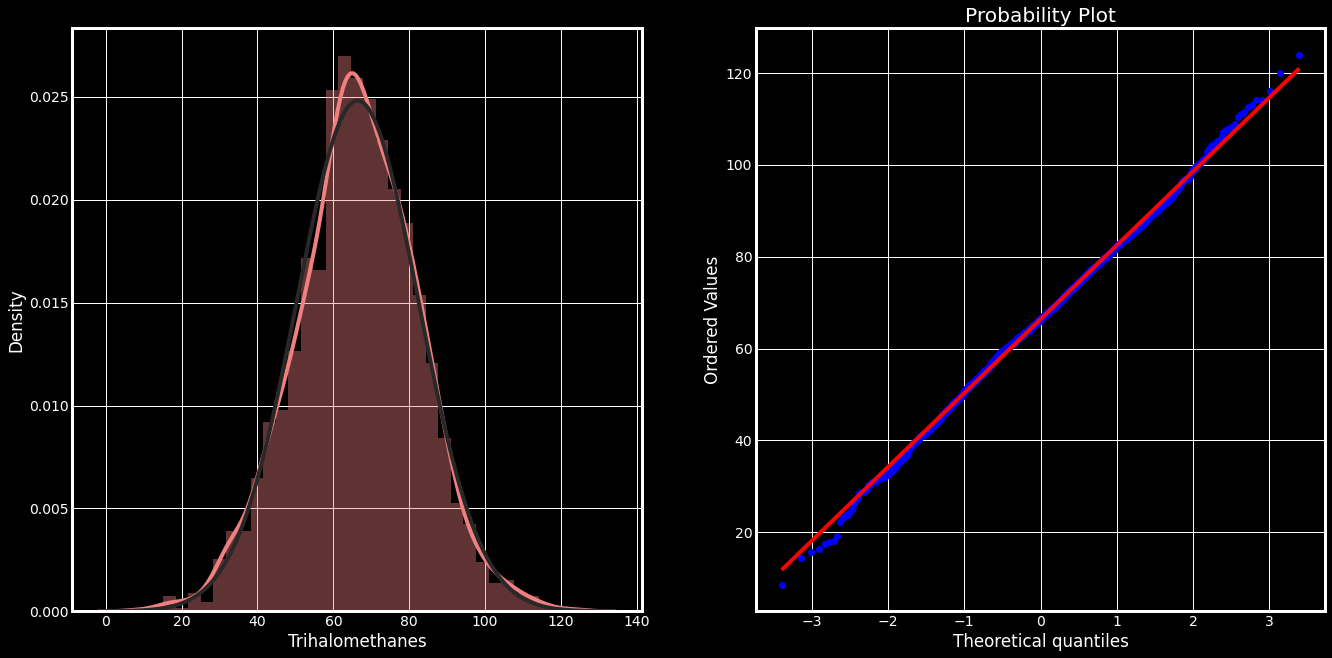

After Correcting
Mu after correcting Trihalomethanes : 83.95893032381015, Sigma after correcting Trihalomethanes : 21.978181620347776


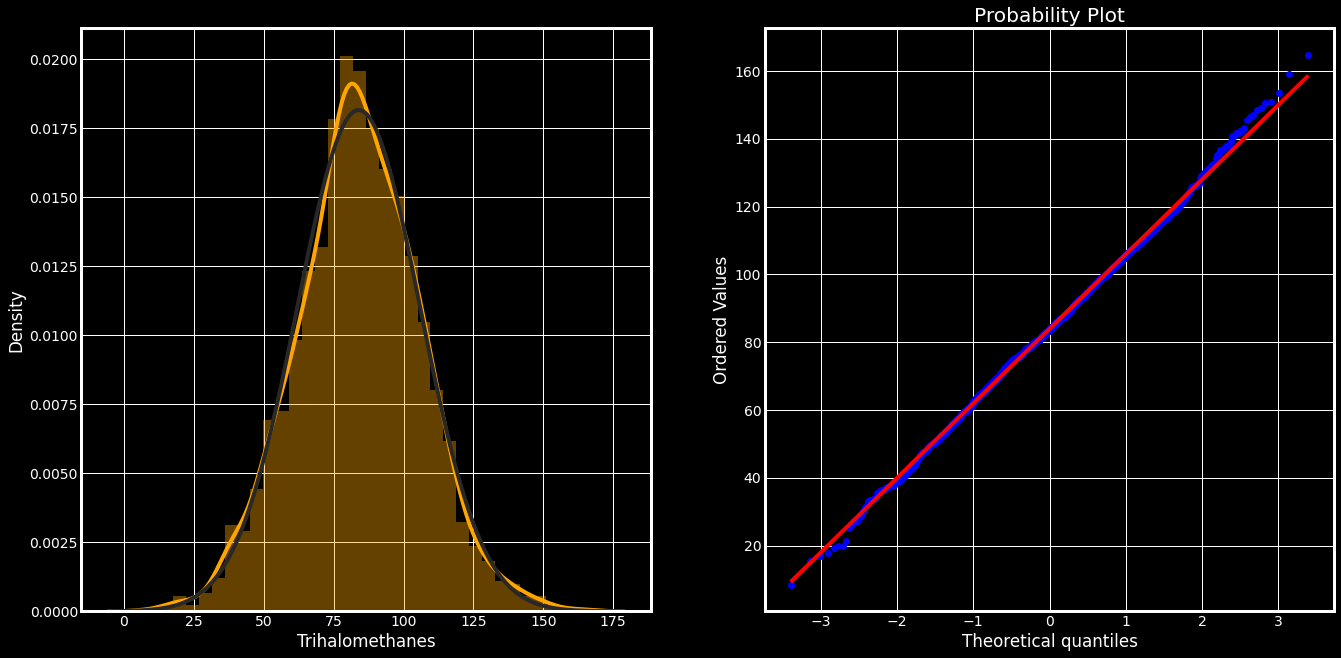

Before Correcting
Mu before correcting Turbidity : 3.9697287992523864, Sigma before correcting Turbidity : 0.7801521151552843


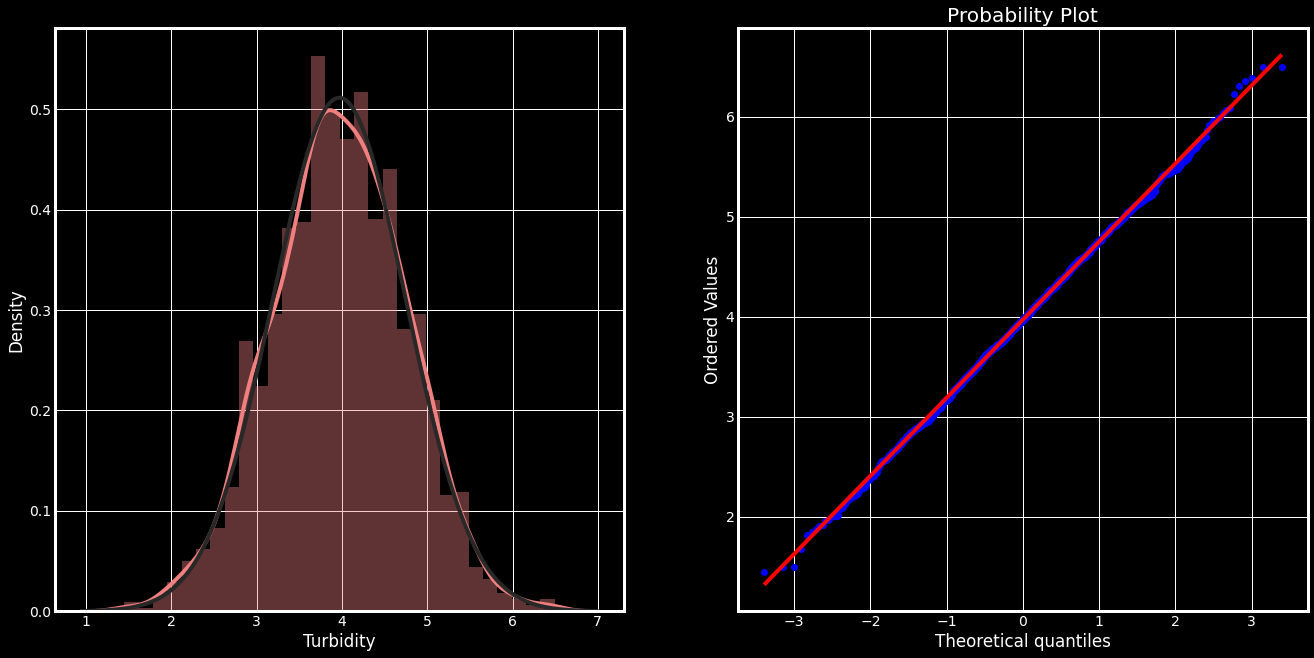

After Correcting
Mu after correcting Turbidity : 3.0902590973775554, Sigma after correcting Turbidity : 0.8298921753012327


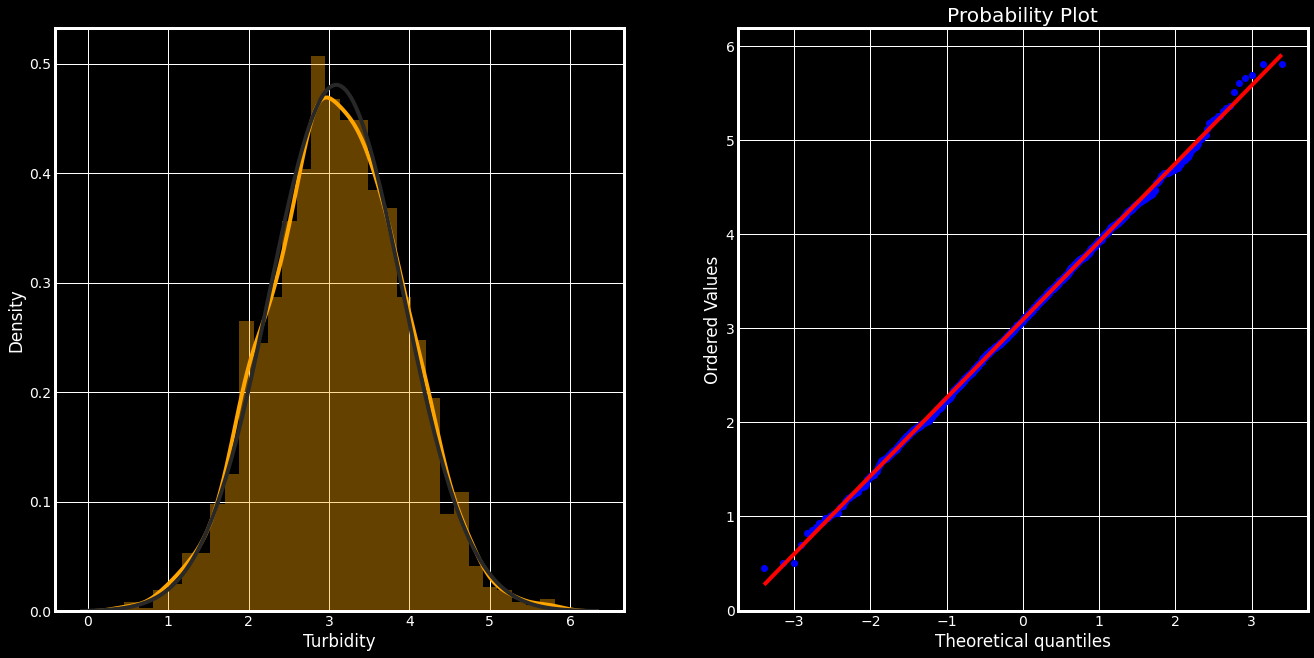

In [20]:
skewedColumns = [ 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
for column in skewedColumns:
    skewnessCorrector(dataset,column)

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h3 style="text-align:center;" >Above function's 
<a href="https://github.com/d4rk-lucif3r/EasifyML">Github Repo</a></h3>

</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Preparing Features and labels </h2>
</div>



In [21]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]

In [22]:
features , labels

(             ph    Hardness      Solids  Chloramines     Sulfate  \
 3      8.316766  475.499080  389.811914     7.361403  792.455724   
 4      9.092223  389.566890  349.605116     5.755102  673.091268   
 5      5.584087  407.969544  449.814119     6.814000  715.017699   
 6     10.223862  565.015262  449.822758     6.780561  888.166729   
 7      8.635849  446.772977  301.754958     3.666376  655.895049   
 ...         ...         ...         ...          ...         ...   
 3267   8.989900  477.265974  327.501992     5.491407  680.150971   
 3268   6.702547  457.070718  341.883079     6.987582  658.914804   
 3269  11.491011  181.130465  516.426703     8.646340  545.670112   
 3270   6.069616  403.736879  427.415646     7.029525  763.652188   
 3271   4.668102  421.750973  589.379936     6.412268  800.367107   
 
       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
 3        24.449134       18.499074       131.073607   3.790751  
 4        25.475858       11.074299   

In [23]:
features.shape, labels.shape

((2011, 9), (2011,))



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Model Training</h1>
</div>




In [24]:
accuracy_scores =  {}



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Logistic Regression</h2>
</div>





Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Logistic Regression on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[218   8]
 [240  14]]


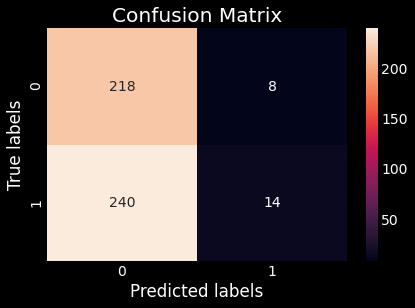

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.48333333333333334
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 51.09 %
Standard Deviation: 1.62 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.4397313594818115 seconds 



In [25]:
params = {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'newton-cg'}
classifier_name,accuracy = cls.Classification(predictor = 'lr', params=params).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Support Vector Machine</h2>
</div>





Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Support Vector Machine on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[159  67]
 [167  87]]


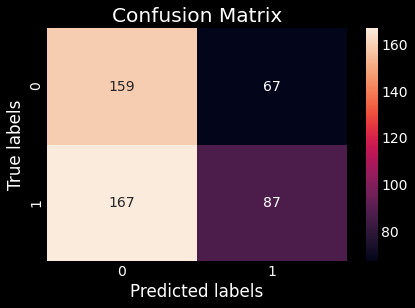

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5125
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 52.45 %
Standard Deviation: 3.56 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  1.8057489395141602 seconds 



In [26]:
params = {'C': .75, 'gamma': 0.2,
          'kernel': 'linear', 'random_state': 42}
classifier_name,accuracy = cls.Classification(predictor = 'svm', 
                                              params= params, 
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training K-Nearest Neighnours</h2>
</div>






Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training K-Nearest Neighbours on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[144  82]
 [ 58 196]]


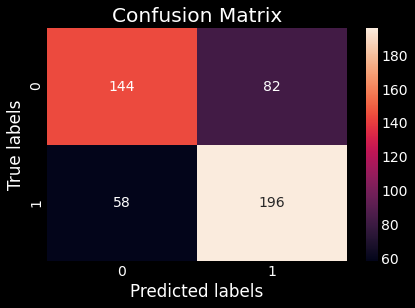

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7083333333333334
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 70.99 %
Standard Deviation: 2.85 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.448336124420166 seconds 

CPU times: user 539 ms, sys: 158 ms, total: 697 ms
Wall time: 449 ms


In [27]:
%%time
params = {'algorithm': 'kd_tree', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}
classifier_name,accuracy = cls.Classification(predictor = 'knn', 
                                              params= params, 
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Decision Trees</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Decision Tree Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[122 104]
 [ 87 167]]


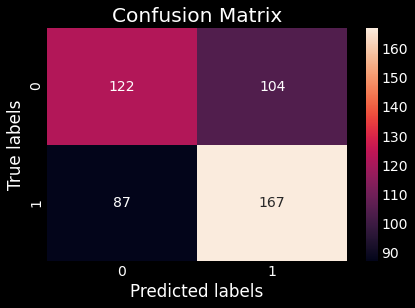

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6020833333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 62.08 %
Standard Deviation: 2.50 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.4590139389038086 seconds 

CPU times: user 534 ms, sys: 168 ms, total: 702 ms
Wall time: 459 ms


In [28]:
%%time
params = {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'splitter': 'best', 'random_state': 42}
classifier_name,accuracy = cls.Classification(predictor = 'dt', 
                                              params= params, 
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Gausian naive Bayes</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Naive Bayes Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[147  79]
 [119 135]]


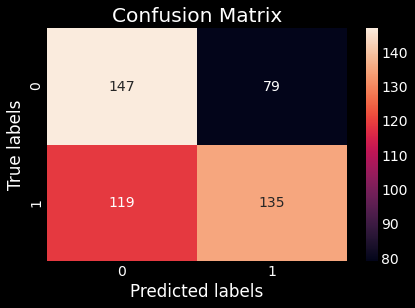

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5875
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 58.80 %
Standard Deviation: 3.44 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.3015172481536865 seconds 



In [29]:
classifier_name,accuracy = cls.Classification(predictor = 'nb', 
                                         
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Random Forest</h2>
</div>




Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Random Forest Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[168  58]
 [ 93 161]]


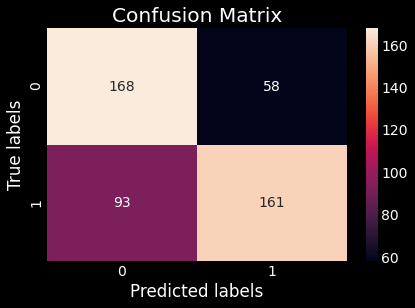

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6854166666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 73.23 %
Standard Deviation: 2.54 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  10.414811611175537 seconds 



In [30]:
params = {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150,'random_state':0}
classifier_name,accuracy = cls.Classification(predictor = 'rfc', 
                                              params= params, 
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training XGBoost Classifier</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training XGBClassifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[148  78]
 [ 97 157]]


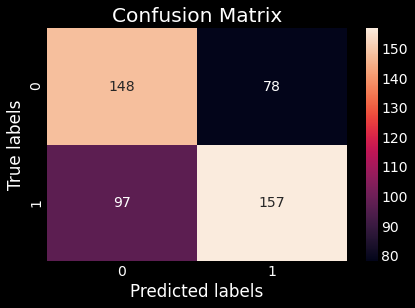

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6354166666666666
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 69.32 %
Standard Deviation: 2.65 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  22.89976215362549 seconds 

CPU times: user 1min 24s, sys: 521 ms, total: 1min 24s
Wall time: 22.9 s


In [31]:
%%time
params = {'learning_rate':0.02, 'n_estimators':600, 'objective':'binary:logistic', 'eval_metric':'logloss', 'nthread':-1}
classifier_name,accuracy = cls.Classification(predictor = 'xgb', 
                                              params= params, 
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training ANN</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training ANN on Training Set [*]

Epoch 1/300
62/62 [==============================] - 1s 12ms/step - loss: 0.6974 - accuracy: 0.5053 - val_loss: 0.6890 - val_accuracy: 0.5443
Epoch 2/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5559 - val_loss: 0.6808 - val_accuracy: 0.5781
Epoch 3/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5770 - val_loss: 0.6764 - val_accuracy: 0.5703
Epoch 4/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6042 - val_loss: 0.6636 - val_accuracy: 0.5964
Epoch 5/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6457 - 

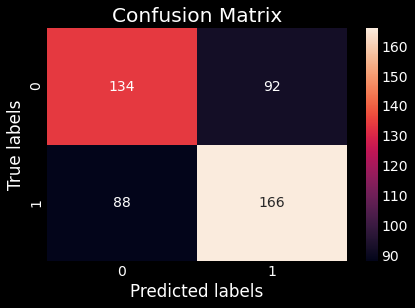

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.625
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Epoch 1/300
70/70 [==============================] - 1s 2ms/step - loss: 0.7079 - accuracy: 0.5295
Epoch 2/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5713
Epoch 3/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.5735
Epoch 4/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.6127
Epoch 5/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.6254
Epoch 6/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6344
Epoch 7/300
70/70 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.6651
Epoch 8/300
70/70 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.6691
Epoch 9/300
70/70 [=======================

In [32]:
classifier_name,accuracy = cls.Classification(predictor = 'ann', 
                                            batch_size = 25, input_units = 15, epochs = 300
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Finding which model performed better</h1>
</div>


In [33]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  Random Forest CLassifier with an accuracy of  73.23


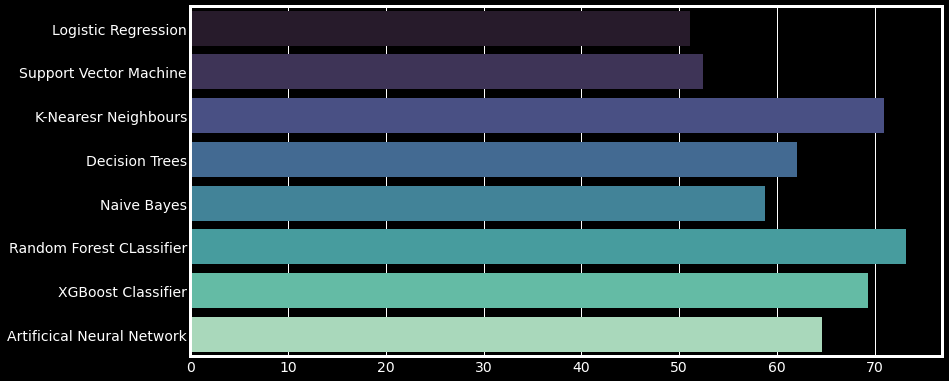

In [34]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = list(accuracy_scores.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='mako');



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Summary</h1>
<h2 style="text-align:center;">Random Forest Classifier Performed Best</h2>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1  style="text-align:center;font-weight: bold">
    <a href = "https://github.com/d4rk-lucif3r/LuciferML">LuciferML<a/>
        </h1>

</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Please give feedback by commenting below and If you liked my work please consider upvoting</h1>
</div>
